## Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

**Objective**

Predicting mortality caused by Heart Failure


**About this dataset**

> Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
> Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.


>Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.


>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


**How to use this dataset**

> Create a model for predicting mortality caused by Heart Failure.

> Your kernel can be featured here!

> More datasets

## Import pustaka yang dibutuhkan

In [250]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mutual_info_score



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Loading

In [251]:
data = pd.read_csv('./dataset/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [252]:
# Check info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari data info diatas kita bisa melihat setiap tipe data features dan tidak ada missing values

In [253]:
# Check dimensi data
data.shape

(299, 13)

Splitting Data menjadi Data Numerik dan Data Categorik

In [254]:
data_numeric = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
data_numeric.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [255]:
data_categoric = data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
data_categoric.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


## Data Cleaning

### Check Outlier

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

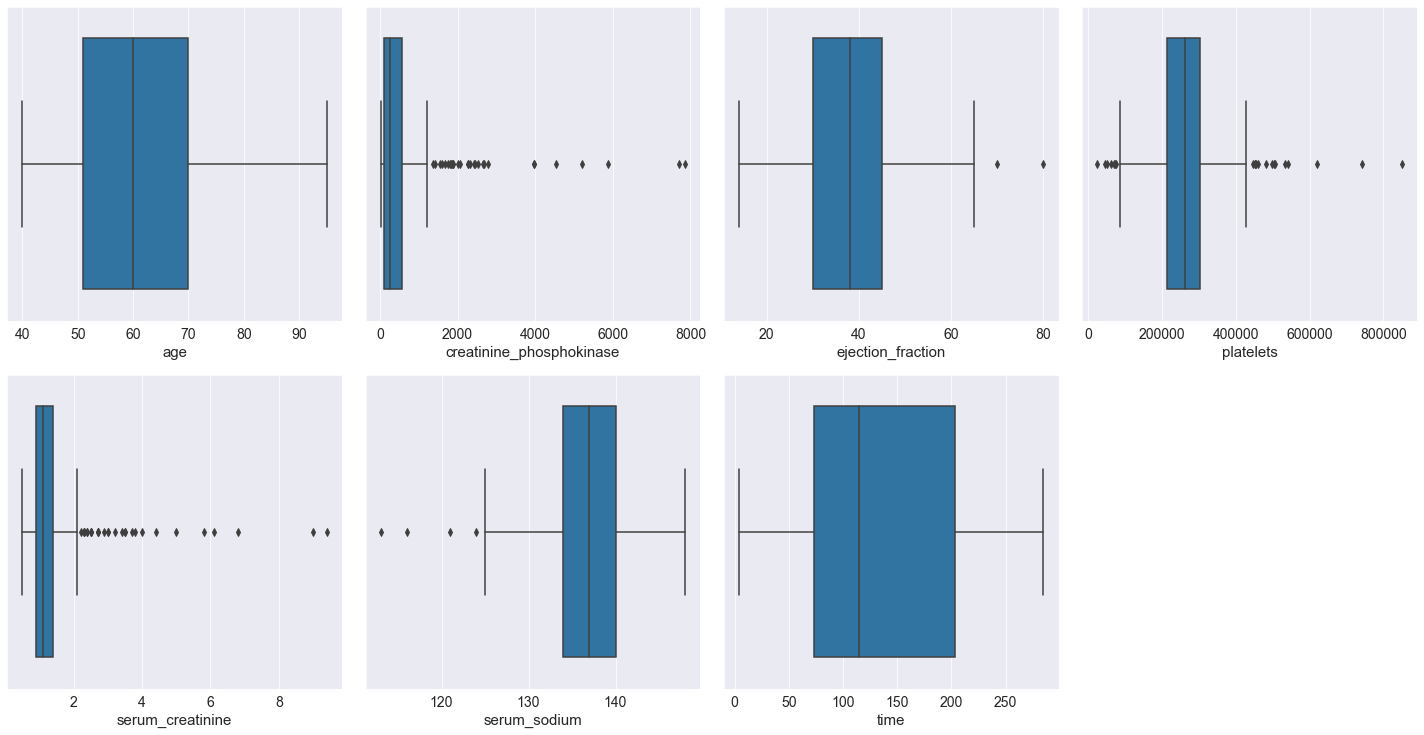

In [256]:
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data_numeric:
    if plotnumber <= 7:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(data_numeric[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Terdapat outlier pada features creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium. Namun dikarenakan kita menggunakan algorithms yang berbasis Tree maka kita bisa abaikan outlier

### Check Missing Values

In [257]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada data yang missing

## Explorasi Data

In [264]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


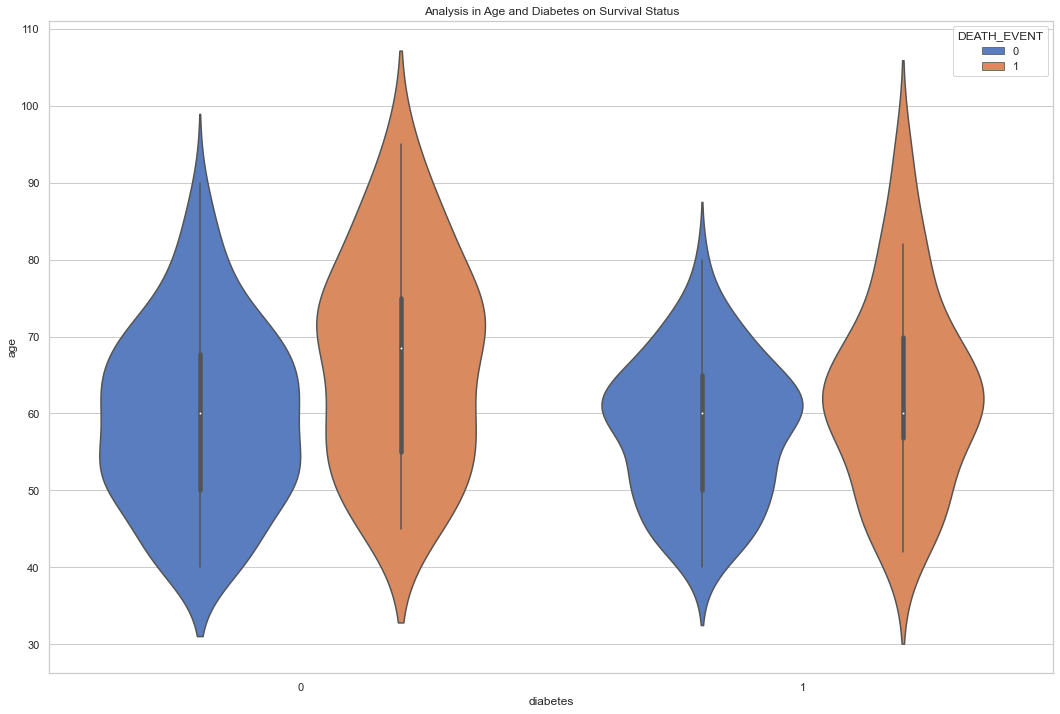

In [286]:
plt.figure(figsize=(18, 12))
sns.violinplot(x='diabetes', y='age', hue='DEATH_EVENT',
              data=data, palette="muted")
plt.xlabel('diabetes')
plt.ylabel('age')
plt.title("Analysis in Age and Diabetes on Survival Status")
plt.show()

Persebaran paling banyak seseorang yang tidak dapat bertahan hidup dengan memiliki resiko diabetes berkisar di rentang usia 60-70

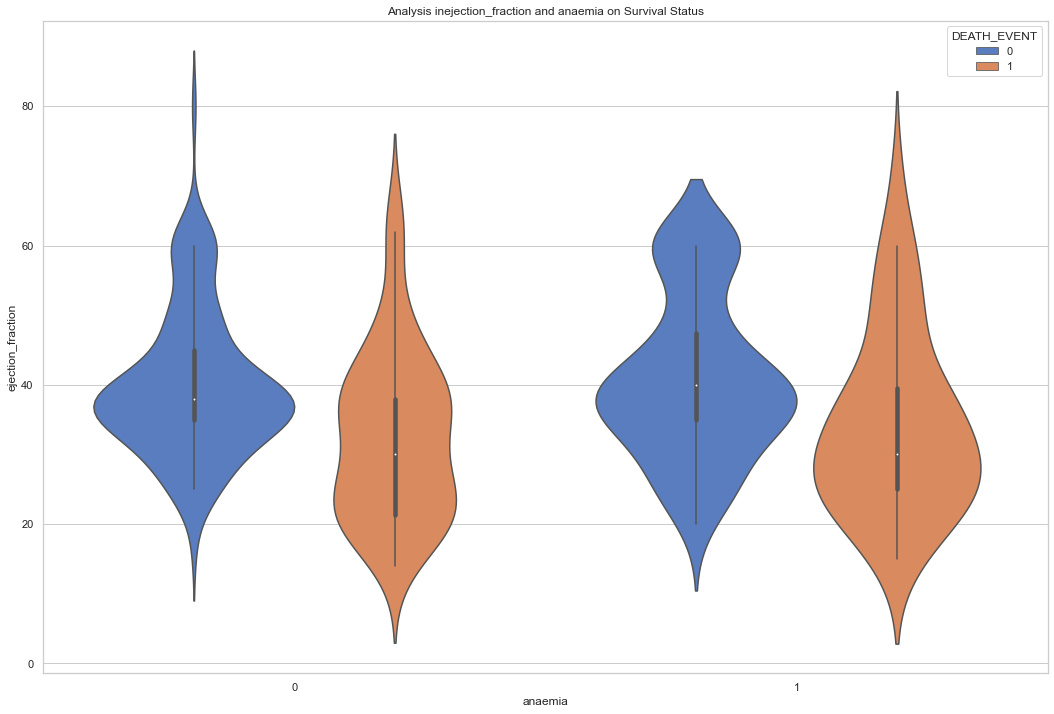

In [288]:
plt.figure(figsize=(18, 12))
sns.violinplot(x='anaemia', y='ejection_fraction', hue='DEATH_EVENT',
              data=data, palette="muted")
plt.xlabel('anaemia')
plt.ylabel('ejection_fraction')
plt.title("Analysis inejection_fraction and anaemia on Survival Status")
plt.show()

Persebaran paling banyak seseorang yang tidak dapat bertahan hidup dengan memiliki resiko anaemia memiliki ejection_fraction berkisar di rentang 20-40


ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

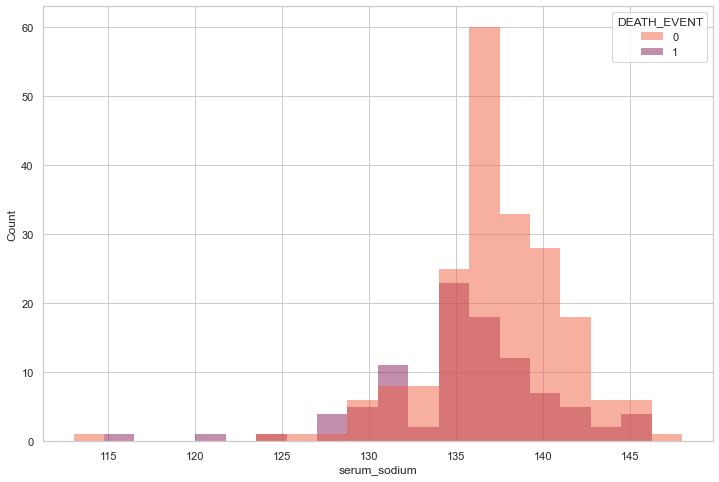

In [273]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(
   data=data, x="serum_sodium", hue="DEATH_EVENT",
   fill=True, common_norm=False, palette="rocket_r",
   alpha=.5, linewidth=0,
)

Level serum sodium yang tidak dapat bertahan hidup paling besar lebih dari 135, namun begitu juga seseorang yang dapat bertahan hidup Level serum sodium dapat bertahan hidup paling besar lebih dari 135. Dari data ini saling bertolak belakang informasi yang kita dapatkan

<AxesSubplot:xlabel='platelets', ylabel='Count'>

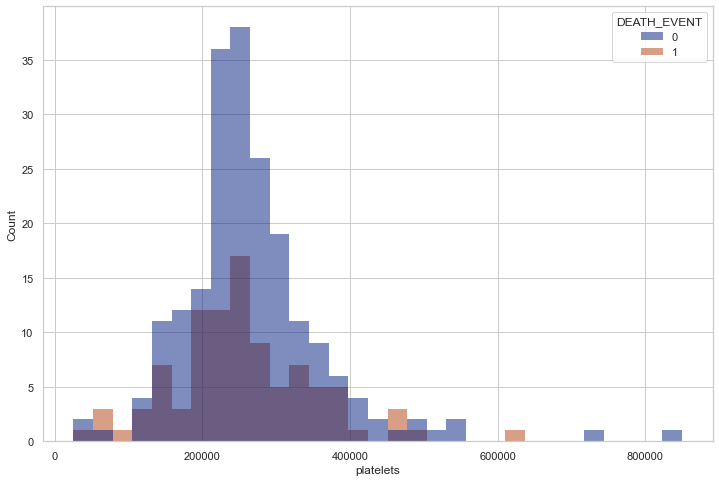

In [307]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(
   data=data, x="platelets", hue="DEATH_EVENT",
   fill=True, common_norm=False, palette="dark",
   alpha=.5, linewidth=0,
)

Platelets dalam darah dari grafik kedua data baik yang tidak dapat bertahan hidup maupun yang dapat bertahan hidup memiliki distribusi yang hampir sama

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

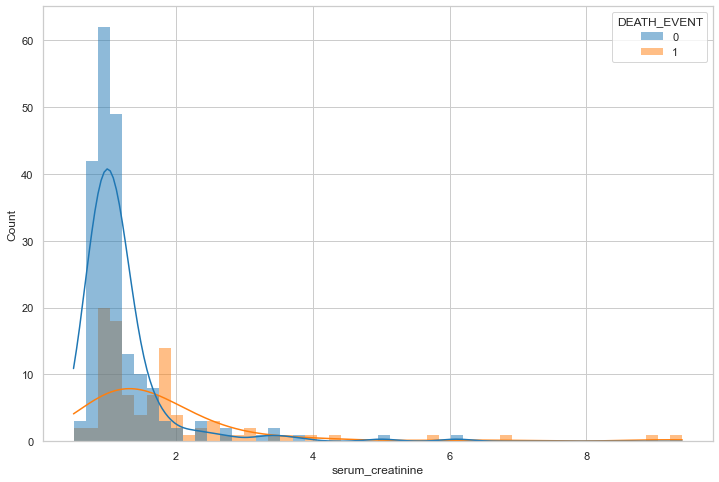

In [279]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(
   data=data, x="serum_creatinine", hue="DEATH_EVENT",
   fill=True, common_norm=False, bins=50, palette="tab10",
   alpha=.5, linewidth=0, kde=True
)

Level serum creatinine dalam darah memiliki distribusi right skewness baik yang dapat bertahan hidup maupun yang tidak bertahan hidup dapat disimpulkan persebaran data terbanyak Level serum creatinine dalam darah antara 0-2

In [301]:
data_dead = data[data['DEATH_EVENT']==1]

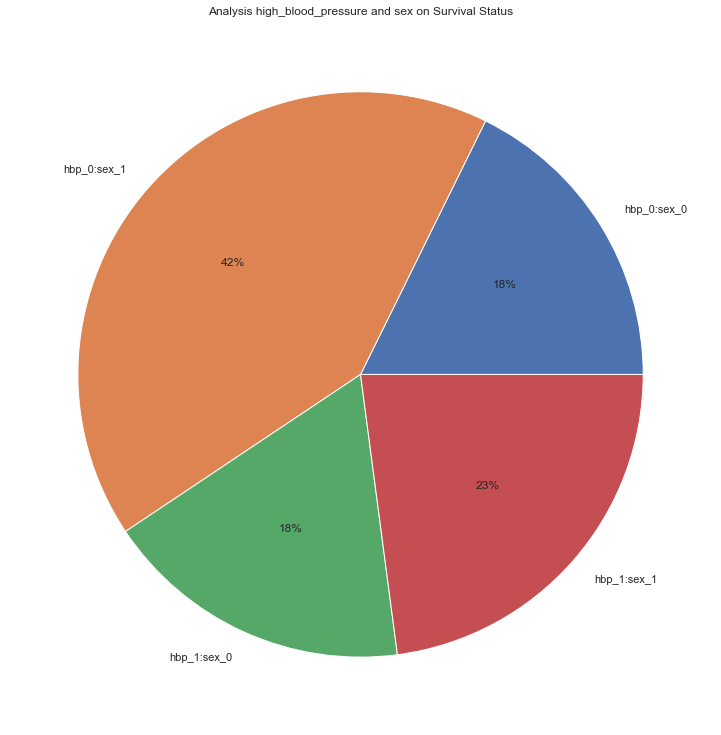

In [308]:
plt.figure(figsize=(15, 13))
labels = ['hbp_0:sex_0', 'hbp_0:sex_1', 'hbp_1:sex_0', 'hbp_1:sex_1']
data_hbp_sex = data_dead.groupby(['high_blood_pressure', 'sex'])['DEATH_EVENT'].count()
plt.pie(data_hbp_sex, labels=labels, autopct='%1.0f%%')
plt.title("Analysis high_blood_pressure and sex on Survival Status")
plt.show()

Hasil dari seseorang yang tidak dapat bertahan hidup berdasarkan high blood pressure dan sex:

1. 42% HBP:0, Sex:1
2. 23% HBP:1, sex:1
3. 18% untuk masing-masing HBP:1, sex:0 dan HBP:0, Sex:0



C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


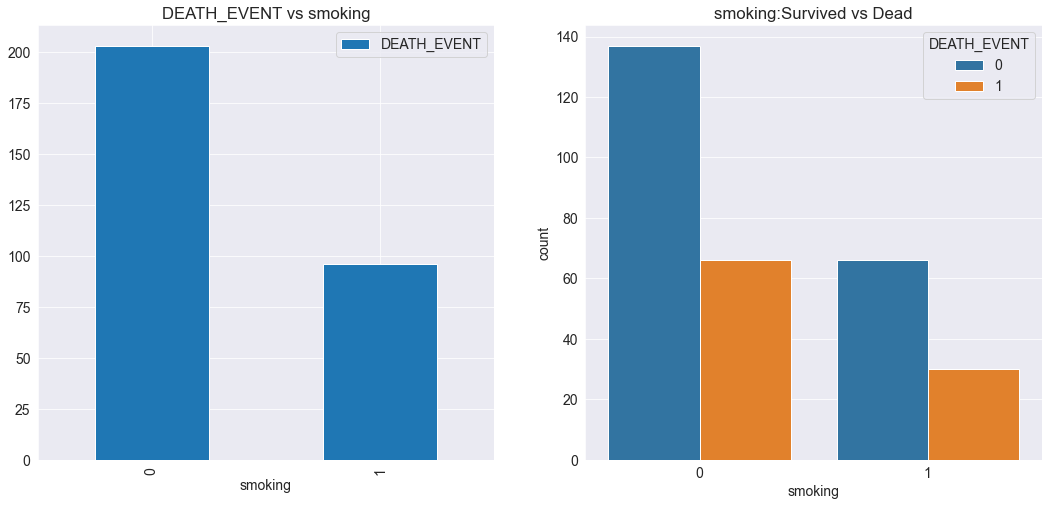

In [186]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['smoking','DEATH_EVENT']].groupby(['smoking']).count().plot.bar(ax=ax[0])
ax[0].set_title('DEATH_EVENT vs smoking')
sns.countplot('smoking',hue='DEATH_EVENT',data=data,ax=ax[1])
ax[1].set_title('smoking:Survived vs Dead')
plt.show()

Dari bar chart diatas kita bisa lihat proporsi dari orang yang merokok hampir 50% dari perokok tidak dapat bertahan hidup dari serangan jantung

## Data Preprocessing

In [189]:
# Copy data
df = data.copy()

Split Data Train dan Data Test

In [190]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Pendefinisian Model

**Random Forest**

Base model adalah model dengan default parameter

In [192]:
rf = RandomForestClassifier()

pipeline_rf = Pipeline([
                      ("algo_rf", rf)
                ])

**Adaboost**

Base model adalah model dengan default parameter

In [193]:
clf = AdaBoostClassifier()

pipeline_adaboost = Pipeline([
                      ("algo_adaboost", clf)
                ])

## Pelatihan Model

**Random Forest**

In [231]:
base_rf_model = pipeline_rf.fit(X_train, y_train)

**Adaboost**

In [195]:
base_adaboost_model = pipeline_adaboost.fit(X_train, y_train)

## Evaluasi Model

Evaluasi model kita akan membandingkan 3 hal berikut ini:

>1. Base Model
>2. Feature Selection
>3. HyperParameter Tuning


Base Model adalah model tanpa hyperparameter tuning kemudian kita akan lakukan feature selection untuk melilih feature yang sensitif terhadap data kemudian setelah model kita akan kita tuning dan terkahir akan digunakan sebagai model inference. Metric yang akan kita gunakan disini adalah precision, F1-Score dan ROC-AUC dengan tujuan bahwa resiko lebih besar adalah salah mendeteksi seseorang yang mampu bertahan hidup namun faktanya tidak dapat bertahan hidup.  

### 1. Base Model

**Random Forest**

In [196]:
base_rf_model.score(X_test, y_test)

0.8166666666666667

In [197]:
y_pred = base_rf_model.predict(X_test)

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



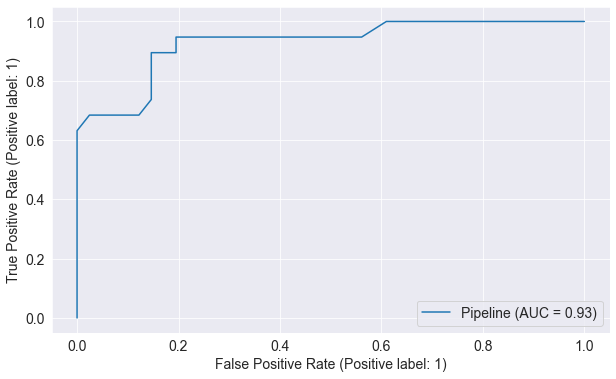

In [200]:
RocCurveDisplay.from_estimator(base_rf_model, X_test, y_test)

Precision untuk seseorang dapat bertahan hidup 0.70, f1-score 0.72 dan ROC-AUC 0.93

**Adaboost**

In [201]:
base_adaboost_model.score(X_test, y_test)

0.8333333333333334

In [202]:
y_pred = base_adaboost_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



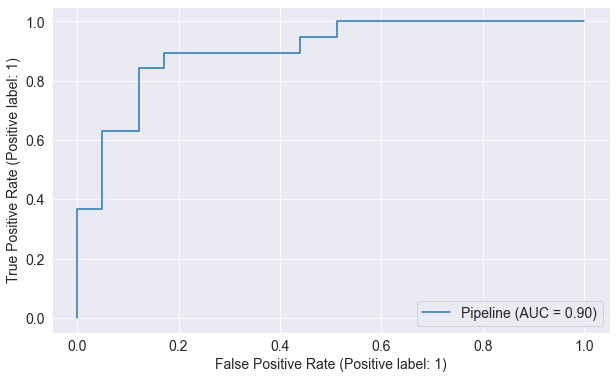

In [203]:
RocCurveDisplay.from_estimator(base_adaboost_model, X_test, y_test)

Precision untuk seseorang dapat bertahan hidup 0.74, f1-score 0.74 dan ROC-AUC 0.90

### 2. Feature Selection

**Mutual Information**

Kita akan menggunakan Mutual Information sebagai feature selection untuk melihat feature mana yang memiliki nilai sensitivitas yang tinggi terhadap variabel target


In [204]:
def calculate_mi(series):
    return mutual_info_score(series, data.DEATH_EVENT)

In [205]:
# Numerical Input, Categorical Output
df_mi_num = data_numeric.apply(calculate_mi)
df_mi_num = df_mi_num.sort_values(ascending=False).to_frame(name='MI')
print('-'*100)
print('#Mutual Information Numerical Input, Numerical Output#')
print(df_mi_num)
 
#  Categorical Input, Categorical Output
df_mi_cat = data_categoric.apply(calculate_mi)
df_mi_cat = df_mi_cat.sort_values(ascending=False).to_frame(name='MI')
print('-'*100)
print('#Mutual Information Numerical Input, Numerical Output#')
print(df_mi_cat)

----------------------------------------------------------------------------------------------------
#Mutual Information Numerical Input, Numerical Output#
                                MI
time                      0.514155
creatinine_phosphokinase  0.443626
platelets                 0.365035
serum_creatinine          0.180256
age                       0.137524
ejection_fraction         0.114313
serum_sodium              0.083258
----------------------------------------------------------------------------------------------------
#Mutual Information Numerical Input, Numerical Output#
                           MI
high_blood_pressure  0.003115
anaemia              0.002188
smoking              0.000080
sex                  0.000009
diabetes             0.000002


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [206]:
data_numeric

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [207]:
X_selection = data_numeric
y_selection = df['DEATH_EVENT']

In [ ]:
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_selection, y_selection, test_size=0.2, stratify=y, random_state=0)

**Random Forest**

In [208]:
select_rf_model = pipeline_rf.fit(X_train_select, y_train_select)
select_rf_model.score(X_test_select, y_test_select)

0.85

In [209]:
y_pred_select = base_rf_model.predict(X_test_select)
print(classification_report(y_test_select, y_pred_select))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



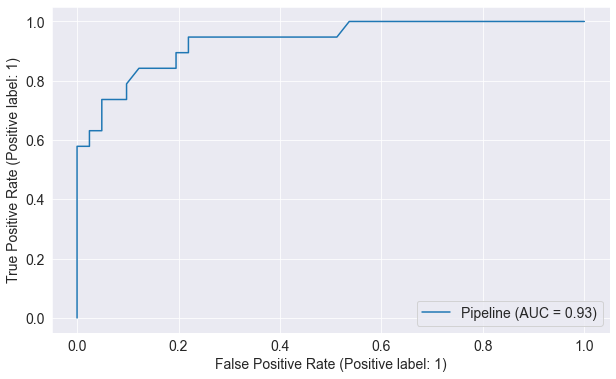

In [210]:
RocCurveDisplay.from_estimator(select_rf_model, X_test_select, y_test_select)

Precision untuk seseorang dapat bertahan hidup 0.78, f1-score 0.76 dan ROC-AUC 0.93

**Adaboost**

In [211]:
select_adaboost_model = pipeline_adaboost.fit(X_train_select, y_train_select)
select_adaboost_model.score(X_test_select, y_test_select)

0.8166666666666667

In [212]:
y_pred_select = base_adaboost_model.predict(X_test_select)
print(classification_report(y_test_select, y_pred_select))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



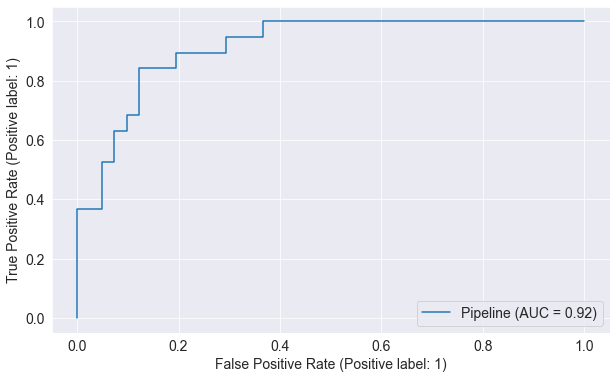

In [213]:
RocCurveDisplay.from_estimator(select_adaboost_model, X_test_select, y_test_select)

Precision untuk seseorang dapat bertahan hidup 0.72, f1-score 0.70 dan ROC-AUC 0.92

Dengan memperhatikan hasil precision, f1-score dan ROC_AUC dari kedua model dari hasil feature selection maka kita akan tetap pertahankan base model untuk kemudian dilakukan hyperparameter tuning hal ini dikarenakan model hasil feature selection kurang bagus dari base model

### Hyperparameter Tuning

**Random Forest**

Hyperparameter dipilih untuk jumlah pohon 10, 100, 1000 untuk mengetahui hasil dari masing-masing pohon score yang paling bagus, max_features dipilih method sqrt dan log2 karena random forest adalah metode ensemble yang milih sample agar modelnya saling independent antar sample maka kita pilih sample dengan menggunakan akar kuadrat dari sample dan log2 akar kuadrat 

In [214]:
parameter_rf = {
    "algo_rf__n_estimators":  [10, 100, 1000],
    "algo_rf__max_features": ['sqrt', 'log2']
}

model_rf = GridSearchCV(pipeline_rf, param_grid= parameter_rf, cv = 5, n_jobs=-1, verbose=1)

In [215]:
hyper_model_rf = model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [216]:
hyper_model_rf.best_score_, hyper_model_rf.best_params_

(0.8329787234042554,
 {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 10})

In [217]:
y_pred = hyper_model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



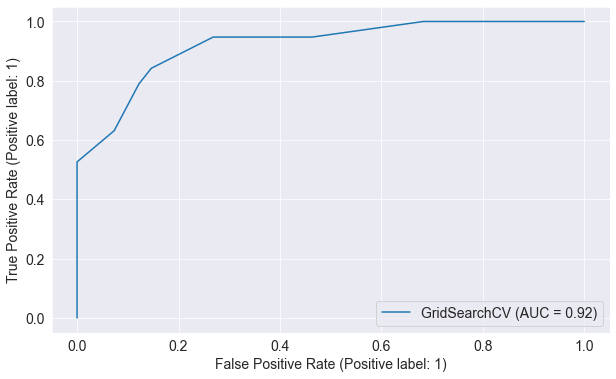

In [218]:
RocCurveDisplay.from_estimator(hyper_model_rf, X_test, y_test)

Precision untuk seseorang dapat bertahan hidup 0.80, f1-score 0.71 dan ROC-AUC 0.92

**AdaBoost**

Hyperparameter dipilih untuk jumlah pohon 10, 100, 1000 untuk mengetahui hasil dari masing-masing pohon score yang paling bagus, algorithma dipilih adalah SAMME, SAMME.R dan kita pilih learning rate 0.1, 0.01, dan 0.001 sebagai bobot yang diaplikasikan ke dalam setiap iterasi boosting. learning rate lebih tinggin meningkatkan kontribusi dari setiap classifier. 

In [219]:
parameter_adaboost = {
    "algo_adaboost__n_estimators":  [10, 100, 1000],
    "algo_adaboost__algorithm": ['SAMME', 'SAMME.R'],
    "algo_adaboost__learning_rate": [0.1, 0.01, 0.001]
}

model_adaboost = GridSearchCV(pipeline_adaboost, param_grid= parameter_adaboost, cv = 5, n_jobs=-1, verbose=1)

In [220]:
hyper_model_adaboost = model_adaboost.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [221]:
hyper_model_adaboost.best_score_, hyper_model_adaboost.best_params_

(0.8368794326241135,
 {'algo_adaboost__algorithm': 'SAMME',
  'algo_adaboost__learning_rate': 0.1,
  'algo_adaboost__n_estimators': 10})

In [222]:
y_pred = hyper_model_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



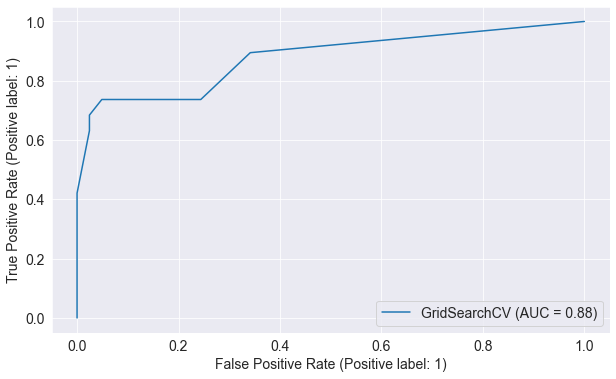

In [223]:
RocCurveDisplay.from_estimator(hyper_model_adaboost, X_test, y_test)

Precision untuk seseorang dapat bertahan hidup 0.92, f1-score 0.75 dan ROC-AUC 0.88

## Model Inference

In [224]:
# Check data train sebaga role model untuk prediksi data baru
X_train.iloc[0:1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
211,50.0,0,582,0,62,1,147000.0,0.8,140,1,1,192


In [226]:
data = [
        [30.0, 1, 300, 0, 60, 1, 130000.0, 0.7, 140, 0, 0, 150],
        [50.0, 0, 400, 1, 50, 0, 153000.0, 1.0, 140, 1, 1, 200]

      ]
X_pred = pd.DataFrame(data, index=[1, 2], columns=X_train.columns)
X_pred.shape

(2, 12)

Kita gunakan model hasil hyperparameter tuning sebagai model karena memiliki precision yang lebih baik

In [235]:
print("prediksi hyperparameter model Random Forest", hyper_model_rf.predict(X_pred))
print("-"*100)
print("prediksi hyperparameter model Adaboost", hyper_model_adaboost.predict(X_pred))

prediksi hyperparameter model Random Forest [0 0]
----------------------------------------------------------------------------------------------------
prediksi hyperparameter model Adaboost [0 0]


Kedua model baik Random Forest maupun Adaboost memprediksi kedua data dapat bertahan hidup

## Pengambilan Kesimpulan

Best Model Random Forest --> max_features: 'sqrt' dan n_estimators: 10

Best Model Adaboost --> algorithm: 'SAMME', learning_rate: 0.1, dan n_estimators: 10

Karena data nya sedikit maka jumlah pohon yang dihasilkan juga sedikit dari kedua model memiliki jumlah pohon terbaik adalah 10 


Model Adaboost memiliki precision yang lebih baik dari Random Forest dengan 0.91 sedangkan random forest 0.80, selanjutnya disarankan menggunakan model Adaboost untuk memprediksi seseorang dapat bertahan hidup dari serangan jantung. Untuk model Adaboost ROC-AUC 0.88 artinya model dapat memprediksi 88% untuk seseorang yang dapt bertahan hidup dan tidak bertahan hidup dari serangan jantung.